In [2]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
import numpy as np
import pandas as pd

In [3]:
#Load the data for the use of demo
df = pd.read_csv('SP500_for_practice_csv.csv', sep = ',')
df

,Date,SP500,SP500_%Change
0,1995/1/3,459.11,NaN
1,1995/1/4,460.71,0.348500
2,1995/1/5,460.34,-0.080311
3,1995/1/6,460.68,0.073858
4,1995/1/9,460.83,0.032561
...,...,...,...
6400,2020/6/4,"3,112.35",-0.336870
6401,2020/6/5,"3,193.93",2.621170
6402,2020/6/8,"3,232.39",1.204159
6403,2020/6/9,"3,207.18",-0.779918


In [6]:
#Chop out one portion of dataframe for demo
df_new = df.head(1000)
print(df_new)
df_new.describe()

           Date    SP500  SP500_%Change
0      1995/1/3   459.11            NaN
1      1995/1/4   460.71       0.348500
2      1995/1/5   460.34      -0.080311
3      1995/1/6   460.68       0.073858
4      1995/1/9   460.83       0.032561
..          ...      ...            ...
995   1998/12/9  1183.49       0.178605
996  1998/12/10  1165.02      -1.560638
997  1998/12/11  1166.46       0.123603
998  1998/12/14   1141.2      -2.165526
999  1998/12/15  1162.83       1.895373

[1000 rows x 3 columns]


,SP500_%Change
count,999.000000
mean,0.097732
std,0.964696
min,-6.865681
25%,-0.360472
50%,0.100876
75%,0.590136
max,5.115224


Basic preprocessing

In [9]:
#drop the missing value
df_new = df_new.dropna()
#print(df_new)

#Set date time index to easily master the data
df_new.set_index('Date', inplace = True)
print(df_new)

              SP500  SP500_%Change
Date                              
1995/1/4     460.71       0.348500
1995/1/5     460.34      -0.080311
1995/1/6     460.68       0.073858
1995/1/9     460.83       0.032561
1995/1/10    461.68       0.184450
...             ...            ...
1998/12/9   1183.49       0.178605
1998/12/10  1165.02      -1.560638
1998/12/11  1166.46       0.123603
1998/12/14   1141.2      -2.165526
1998/12/15  1162.83       1.895373

[999 rows x 2 columns]


In [10]:
#Choose one single dimension --- SP500_%Change ---as the target for forecasting
df_new = df_new.drop(['SP500'], axis = 1)

            SP500_%Change
Date                     
1995/1/4         0.348500
1995/1/5        -0.080311
1995/1/6         0.073858
1995/1/9         0.032561
1995/1/10        0.184450
...                   ...
1998/12/9        0.178605
1998/12/10      -1.560638
1998/12/11       0.123603
1998/12/14      -2.165526
1998/12/15       1.895373

[999 rows x 1 columns]


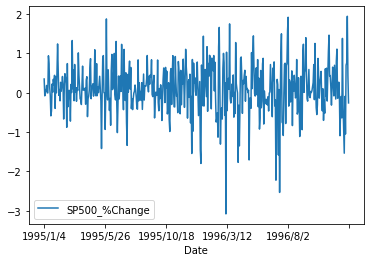

In [13]:
# Visualisation
%matplotlib inline
df_new.head(500).plot()
print(df_new)

In [21]:
#Split training and testing set
df_train = df_new["1995/1/4":"1997/12/31"]
df_test = df_new["1997/12/31":] # ["start_date": ] start date to end
print(df_train.shape)
print(df_test.shape)

(758, 1)
(242, 1)


Sequential Data

In [24]:
print(type(df_train)); print(type(df_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [44]:
#Define the sequential data transformation
#Would work better on the pandas.DataFrame type of data
#Resources: #Resources: https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_10_2_lstm.ipynb 

def to_sequential(data, seq_size):
    x = []
    y = []
    for i in range(len(data) - seq_size):
        first_window = data.iloc[i:(i + seq_size), 0]
        further_window = data.iloc[i + seq_size, 0]
        #print(first_window)
        first_window = [[value] for value in first_window]
        x.append(first_window)
        y.append(further_window)
    return np.array(x), np.array(y).reshape(len(y), 1)
    #Series input into array: some data format issue occurs, so .reshape() is called to fix it into proper results.

In [48]:
#Transform the training dataset into sequential-typed data
seq_train_x, seq_train_y = to_sequential(df_train, 1)seq

In [49]:
print(seq_train_x.shape); print(seq_train_y.shape)

(757, 1, 1)
(757, 1)


In [51]:
#print(seq_train_x)
#print(seq_train_y)

In [52]:
#Transform the test dataset into sequential-typed data
seq_test_x, seq_test_y = to_sequential(df_test, 1)

In [53]:
print(seq_test_x.shape); print(seq_test_y.shape)

(241, 1, 1)
(241, 1)


Build the LSTM model

In [70]:
#Define the model (the most simple form: 1 LSTM layer and then output layer)
model = Sequential()
model.add(LSTM(units = 64, activation = 'tanh', 
               dropout = 0.0, 
               recurrent_dropout = 0.0, 
               input_shape = (None, 1)))
model.add(Dense(1))

model.compile(optimizer = 'adam', 
             loss = 'mean_squared_error')
             #metrics = ['mean_absolute_percentage_error'])

#Summarise the model
model.summary()

#Fit
model.fit(seq_train_x, seq_train_y, batch_size = 1, 
          #validation_data = (seq_test_x, seq_test_y),
          epochs = 15,
          verbose = 2,)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 64)                16896     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
757/757 - 1s - loss: 0.7031
Epoch 2/15
757/757 - 1s - loss: 0.6980
Epoch 3/15
757/757 - 1s - loss: 0.6934
Epoch 4/15
757/757 - 1s - loss: 0.6941
Epoch 5/15
757/757 - 1s - loss: 0.6914
Epoch 6/15
757/757 - 1s - loss: 0.6875
Epoch 7/15
757/757 - 1s - loss: 0.6841
Epoch 8/15
757/757 - 1s - loss: 0.6845
Epoch 9/15
757/757 - 1s - loss: 0.6821
Epoch 10/15
757/757 - 1s - loss: 0.6807
Epoch 11/15
757/757 - 1s - loss: 0.6764
Epoch 12/15
757/757 - 1s - loss: 0.6770
Epoch 13/15
757/757 - 1s - loss: 0.6737


In [71]:
# Try predict on training set
y_predict = model.predict(seq_train_x)
print(y_predict)

[[ 1.31722525e-01]
 [ 3.01503818e-02]
 [ 6.44117147e-02]
 [ 5.49160838e-02]
 [ 9.07752216e-02]
 [ 4.66198102e-02]
 [ 4.66197729e-02]
 [ 2.81157762e-01]
 [ 2.30004430e-01]
 [ 8.06875676e-02]
 [ 3.22898552e-02]
 [-5.08817621e-02]
 [-3.65810804e-02]
 [ 9.98903811e-02]
 [ 4.99855690e-02]
 [ 1.29349202e-01]
 [ 9.17044580e-02]
 [ 1.55642778e-01]
 [-2.75686644e-02]
 [ 1.46831140e-01]
 [ 4.66377065e-02]
 [ 1.72106862e-01]
 [ 3.50706697e-01]
 [ 1.76323965e-01]
 [ 3.26339602e-02]
 [ 6.56161606e-02]
 [ 4.66254167e-03]
 [ 1.10535339e-01]
 [ 5.64883798e-02]
 [ 9.13624018e-02]
 [ 1.48040265e-01]
 [ 8.01115856e-02]
 [-5.78430332e-02]
 [ 8.47844481e-02]
 [ 1.66105434e-01]
 [ 1.39578193e-01]
 [ 1.06043398e-01]
 [-6.74675256e-02]
 [ 2.32068419e-01]
 [-2.11064257e-02]
 [ 2.45647691e-02]
 [ 6.11505359e-02]
 [ 5.73561266e-02]
 [-6.14640974e-02]
 [ 9.74155515e-02]
 [ 4.85085212e-02]
 [ 3.69418770e-01]
 [ 7.00676590e-02]
 [ 1.91065967e-01]
 [ 5.20984828e-03]
 [ 2.26415560e-01]
 [ 5.25686666e-02]
 [ 7.6956823

In [72]:
y_predict.reshape(-1)

array([ 1.31722525e-01,  3.01503818e-02,  6.44117147e-02,  5.49160838e-02,
        9.07752216e-02,  4.66198102e-02,  4.66197729e-02,  2.81157762e-01,
        2.30004430e-01,  8.06875676e-02,  3.22898552e-02, -5.08817621e-02,
       -3.65810804e-02,  9.98903811e-02,  4.99855690e-02,  1.29349202e-01,
        9.17044580e-02,  1.55642778e-01, -2.75686644e-02,  1.46831140e-01,
        4.66377065e-02,  1.72106862e-01,  3.50706697e-01,  1.76323965e-01,
        3.26339602e-02,  6.56161606e-02,  4.66254167e-03,  1.10535339e-01,
        5.64883798e-02,  9.13624018e-02,  1.48040265e-01,  8.01115856e-02,
       -5.78430332e-02,  8.47844481e-02,  1.66105434e-01,  1.39578193e-01,
        1.06043398e-01, -6.74675256e-02,  2.32068419e-01, -2.11064257e-02,
        2.45647691e-02,  6.11505359e-02,  5.73561266e-02, -6.14640974e-02,
        9.74155515e-02,  4.85085212e-02,  3.69418770e-01,  7.00676590e-02,
        1.91065967e-01,  5.20984828e-03,  2.26415560e-01,  5.25686666e-02,
        7.69568235e-02,  

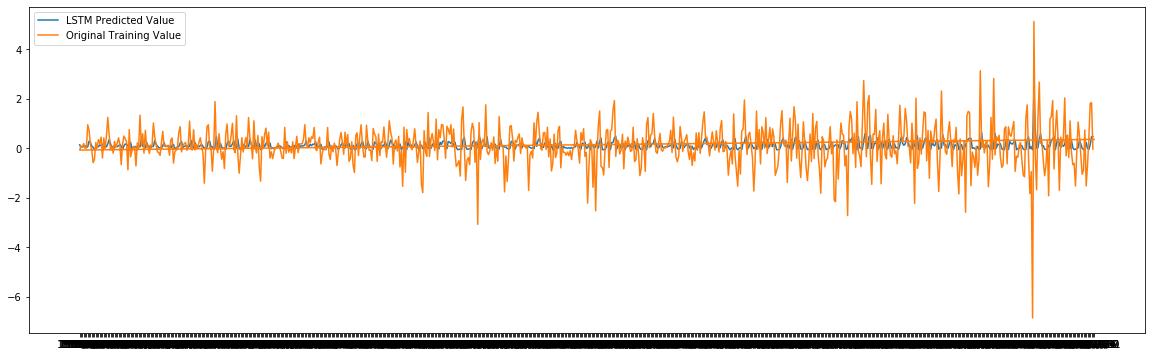

In [80]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
plt.plot(df_train.index[1:len(df_train.index)], y_predict, label = "LSTM Predicted Value")
plt.plot(df_train.index, df_train['SP500_%Change'], label = "Original Training Value")
plt.legend()

In-sample prediction

In [81]:
#Predict on test set
y_predict_test = model.predict(seq_test_x)
y_predict_test.reshape(-1)

array([ 3.82958204e-02,  1.64144322e-01,  9.65872556e-02, -6.48132861e-02,
       -6.10973313e-03, -6.61683828e-02,  4.57076043e-01,  3.51212412e-01,
        3.79408509e-01,  1.99227288e-01, -6.31544441e-02,  3.27171862e-01,
        4.55540866e-01, -6.51500672e-02, -6.53192103e-02, -4.84760292e-02,
        3.30071189e-02,  3.55451196e-01,  2.64802217e-01,  2.52548784e-01,
       -4.44078930e-02,  5.13048172e-01,  1.63462713e-01,  6.80531561e-02,
       -1.73987672e-02,  2.69193709e-01,  1.19385812e-02,  2.51725316e-01,
        7.00886548e-02,  1.46119520e-01, -2.69493610e-02,  1.09851941e-01,
        2.74671912e-01, -2.28416361e-02,  1.90334514e-01,  1.39750227e-01,
       -6.19052686e-02,  3.41444522e-01,  1.84300959e-01,  6.21005930e-02,
        1.46116577e-02,  1.48024693e-01, -3.40684541e-02, -5.91713153e-02,
        4.90963310e-01, -1.51905566e-02,  3.27349365e-01,  1.43975064e-01,
        7.90027529e-02,  2.14118883e-02,  2.95459002e-01,  7.27297515e-02,
        1.62651390e-01,  

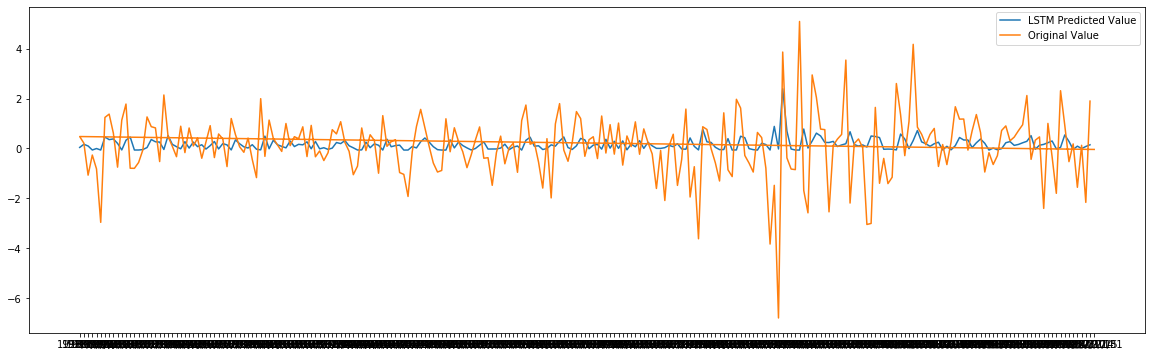

In [83]:
#Plot the in-sample prediction results
plt.figure(figsize=(20,6))
plt.plot(df_test.index[1:len(df_test.index)], y_predict_test, label = "LSTM Predicted Value")
plt.plot(df_test.index, df_test['SP500_%Change'], label = "Original Value")
plt.legend()

It can't really work well due to very simple model structure (only 1 LSTM layer used). However the generic trend and fluctuation are roughly obtained, whilst having a limited volatility that is not enough to reflect how strong the real situation is. 
Ver. 2020-12-17